## QUESTION 1

First, download the **coordinates.csv** file from the files section in Binder to your computer.

We will import it to R.

In order to import a file, you first need to set the working directory of R to the directory that contains the data file.

A working directory can be specified as such (with your own address, of course):

```R
> setwd("C:/Users/Ömer/Desktop/Ders/CMPE 140")
```

Or, you can click on *Session* in the toolbar, then go to *Set Working Directory* and finally click on *Choose Directory* to set it manually.

The default shortcut for this operation is *Ctrl+Shift+H*.

After setting up the working directory, you can import your data set as such:

```R
> coordinates <- read.csv("coordinates.csv", header = FALSE)
```
If your data set has column names, you can write *header = TRUE* or nothing as it is the default setting for this function.

If your data file is in *.txt* format, you can import is as such:

```R
> coordinates <- read.table("coordinates.txt", header = FALSE)
```

Finally, if it's in *.rdata* format, you can import it as such:

```R
> load("coordinates.rdata")
```

and use it by calling the object **coordinates**.

**coordinates** contains the latitudes and longitudes of every province center in Turkey.

Let's examine it:

```R
> head(coordinates)

              V1       V2       V3
1          Adana 36.99142 35.33083
2       Adiyaman 37.76365 38.27726
3 Afyonkarahisar 38.75689 30.53870
4           Agri 39.71907 43.05059
5         Amasya 40.65646 35.83735
6         Ankara 39.93336 32.85974
```

First, let's assign the name **province** to the first column, **latitude** to the second column and **longitude** to the last column.

```R
> head(coordinates)

        province latitude longitude
1          Adana 36.99142  35.33083
2       Adiyaman 37.76365  38.27726
3 Afyonkarahisar 38.75689  30.53870
4           Agri 39.71907  43.05059
5         Amasya 40.65646  35.83735
6         Ankara 39.93336  32.85974
```

Next, create a factor called **region** that will:

- take the value **southwest** if the city's latitude is smaller than 39 and it's longitude is smaller than 35 
- take the value **southeast** if the city's latitude is smaller than 39 and it's longitude is larger than 35 
- take the value **northwest** if the city's latitude is larger than 39 and it's longitude is smaller than 35 
- take the value **northeast** if the city's latitude is larger than 39 and it's longitude is larger than 35 

Then, append **region** to **coordinates** and show the first 6 lines as such:

```R
> head(coordinates)

        province latitude longitude    region
1          Adana 36.99142  35.33083 Southeast
2       Adiyaman 37.76365  38.27726 Southeast
3 Afyonkarahisar 38.75689  30.53870 Southwest
4           Agri 39.71907  43.05059 Northeast
5         Amasya 40.65646  35.83735 Northeast
6         Ankara 39.93336  32.85974 Northwest
```

*Hint: You can either create two seperate factors using the ``cut()`` function and then combine them or you can create the factor directly with a for loop and if statements. In order to convert a vector to a factor, use the ``as.factor()`` function.*


Let's see the number of provinces in each region:

```R
> summary(region)

Northeast Northwest Southeast Southwest 
       20        25        20        16 
```


## SOLUTION 1

In [ ]:
setwd("C:/Users/Ömer/Desktop/Ders/CMPE 140")
coordinates <- read.csv("coordinates.csv", header = FALSE)
coordinates <- read.table("coordinates.txt", header = FALSE)
# load("coordinates.rdata")

head(coordinates)

names(coordinates) <- c("province", "latitude", "longitude")
head(coordinates)

#First alternative
region.1 <- cut(coordinates$latitude,breaks = c(36,39,42.5), labels = c("South","North"))
region.2 <- cut(coordinates$longitude,breaks = c(26,35,44.5), labels = c("West","East"))
region <- c()
for (i in 1:81)
{
    if (region.1[i] == "South" && region.2[i] == "West")
    {    
    region[i] <- "Southwest"     
    }
    else if (region.1[i] == "South" && region.2[i] == "East")
    {    
    region[i] <- "Southeast"     
    }
    else if (region.1[i] == "North" && region.2[i] == "West")
    {    
    region[i] <- "Northwest"     
    }
    else 
    {    
    region[i] <- "Northeast"     
    }
}

region <- as.factor(region)
coordinates <- cbind(coordinates, region) 

head(coordinates)

#Second alternative
region <- c()
for (i in 1:81)
{
    if (coordinates[i,2] < 39 && coordinates[i,3] < 35)
    {    
    region[i] <- "Southwest"     
    }
    else if (coordinates[i,2] < 39 && coordinates[i,3] >= 35)
    {    
    region[i] <- "Southeast"     
    }
    else if (coordinates[i,2] >= 39 && coordinates[i,3] < 35)
    {    
    region[i] <- "Northwest"     
    }
    else 
    {    
    region[i] <- "Northeast"     
    }
}

region <- as.factor(region)
coordinates <- cbind(coordinates, region) 

head(coordinates)

summary(region)

## QUESTION 2

Let's use the built-in data **mtcars** in R. 


In order to show the relationship between miles per gallon and number of cylinders, we will build a boxplot. 


1) Create a function called **box_mt** which create a boxplot for values of **mpg**, classified with respect to **cyl** values. 


* Plot will be named as **Box Plots Miles Per Gallon**, x-axis will be named as **Number of Cylinders**, and y-axis will be named as **Miles Per Gallon**. The first box will be named as **4 cyl**, the second as **6 cyl**, and the third as **8 cyl**.


* The first box should be colored with yellow, the second with blue, and the third with pink. 


Your box plot has to look like this:

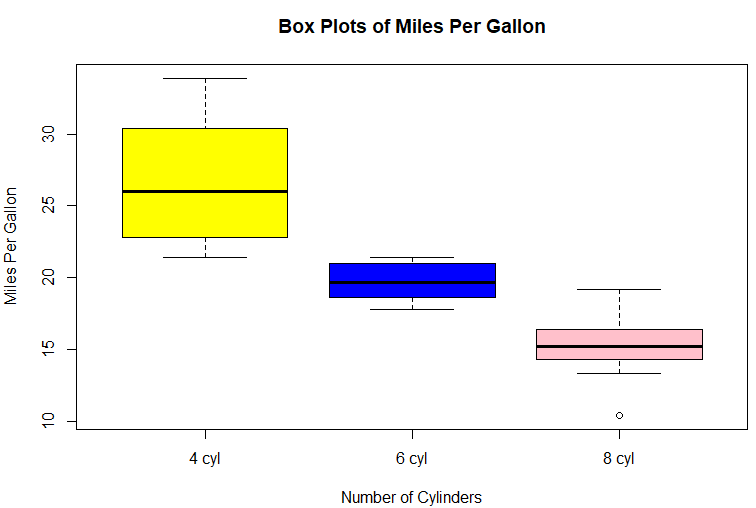

*Hint: You should use subsetting inside the function.*

## SOLUTION 2

In [ ]:
#1
box_mt <- function(){

x1 <- mtcars$mpg[mtcars$cyl==4]
x2 <- mtcars$mpg[mtcars$cyl==6]
x3 <- mtcars$mpg[mtcars$cyl==8]

boxplot(x1, x2, x3, names=c("4 cyl", "6 cyl", "8 cyl"),
        xlab="Number of Cylinders",
        ylab="Miles Per Gallon", 
        main=("Box Plots of Miles Per Gallon"),
        col=c("yellow", "blue", "pink"))
}

box_mt()

## QUESTION 3

There are 100 students in each of the three sections of a MATH102 course. Final exam scores are normally distributed integers. Means and standard deviations of final scores are as follows : 
 * Section 1 : mean = 75, standard deviation = 10
 * Section 2 : mean = 65, standard deviation = 9
 * Section 3 : mean = 70, standard deviation = 9

1) First, copy the lines below. 

```r
RNGversion("3.3.1")
set.seed(30)
```
2) Create 3 vectors named **section_1**, **section_2**, **section_3** which hold the final exam scores of each section. 
```r
> section_1
  [1]  62  72  70  88  93  60  76  67  68  78  65  57  68  74  84 . . .
> section_2
  [1] 70 55 71 60 62 66 58 69 67 66 64 67 59 48 77 54 69 57 74 77 . . .
> section_3
  [1] 68 74 80 68 81 57 74 73 60 71 76 71 79 65 61 78 52 64 78 68 . . .
```

3) Create a function named **strp** with 3 arguments : **sct1**, **sct2**, **sct3** which have **section_1**,**section_2** and **section_3** as their default values. 

   The function should return a strip chart as such :

```r
strp(sct1 = section_1,sct2 = section_2,sct3 = section_3)
```
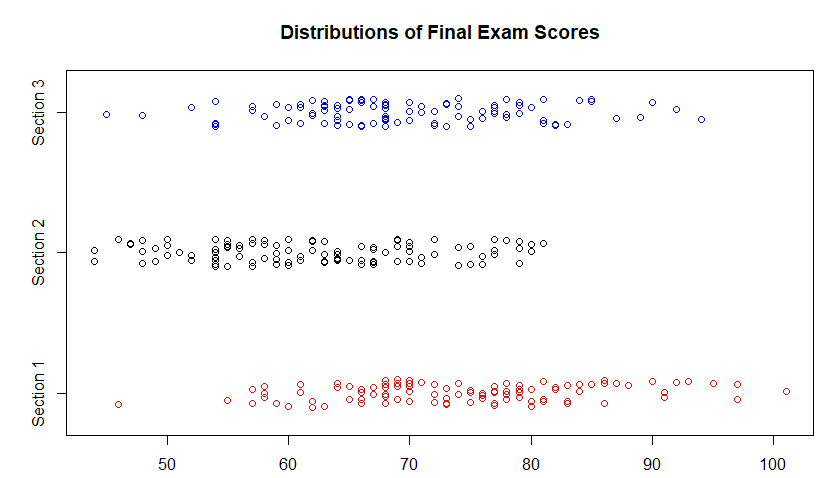

## SOLUTION 3

In [ ]:
#1
RNGversion("3.3.1")
set.seed(30)

#2
section_1 <- round(rnorm(100,  mean = 75, sd = 10)) #Creating the vectors which hold the final scores.
section_2 <- round(rnorm(100, mean = 65, sd = 9))
section_3 <- round(rnorm(100, mean = 70, sd = 9))
section_1
section_2
section_3

#3
strp <- function(sct1 = section_1,sct2 = section_2, sct3 = section_3) #Creating the strip chart.
{
return
    (
           stripchart(list(sct1, sct2, sct3),
            pch = 1,
            col = c("red","black","blue"),
            method = "jitter",
            group.names = c("Section 1", "Section 2", "Section 3"),
            main = "Distributions of Final Exam Scores" )
    )
}
strp(sct1 = section_1,sct2 = section_2,sct3 = section_3)

## QUESTION 4

There are two concerts today at The O2 London: one of them is a Radiohead concert, and the other one is a Bon Iver concert. The O2 London would like to know the density of ages of people who bought a ticket for research purposes. They choose 20 random people and gather the data as such.

1) Copy and paste this data.

```r
radiohead_ages <- c(20, 19, 22, 23, 24, 23, 27, 29, 32, 34, 28, 27, 23, 25, 24, 26, 27, 24, 25, 19)
boniver_ages <- c(26, 82, 75, 69, 52, 55, 39, 47, 45, 23, 59, 53, 48, 43, 38, 46, 39, 50, 51, 32)
```

2) Combine the age data into a vector called **all_ages**.


3) Calculate the density of the ages of the attendees and name them **radiohead_density** and **boniver_density**. 


4) Plot the density of the ages of the attendees. Set the main title as **Age Study** and the x label as **Ages**. Attendees from Radiohead concert should be colored red, and attendees from Bon Iver concert should be colored blue. Set the line thickness as 2. Set the plot limits as the minimum and the maximum ages of all attendees using **all_ages** vector.

Your density plot should look like this:

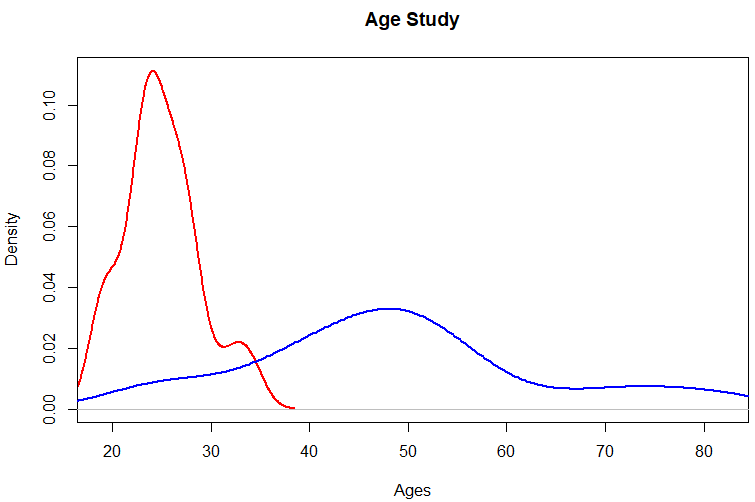

## SOLUTION 4

In [ ]:
#1
radiohead_ages <- c(20, 19, 22, 23, 24, 23, 27, 29, 32, 34, 28, 27, 23, 25, 24, 26, 27, 24, 25, 19)
radiohead_ages
boniver_ages <- c(26, 82, 75, 69, 52, 55, 39, 47, 45, 23, 59, 53, 48, 43, 38, 46, 39, 50, 51, 32)
boniver_ages

#2
all_ages <- c(radiohead_ages, boniver_ages)
all_ages

#3
radiohead_density <- density(radiohead_ages)
radiohead_density
boniver_density <- density(boniver_ages)
boniver_density

#4
plot(radiohead_density, main = "Age Study", xlab = "Ages", col = "red", lwd = 2, xlim = c(min(all_ages), max(all_ages)))
lines(boniver_density, col = "blue", lwd = 2)